# 散布図
- sns.jointplot( )
    - ２変数間の散布図を描画する事ができる

- sns.pairplot( )
    - DataFrame 内にある全ての数値項目の各　pair の散布図を描画できる
        - **pairplot　は　Seaborn でも一番重要と言っても過言ではないくらい使用頻度が高い**

In [1]:
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../pandas/dataset/tmdb_5000_movies.csv')

### sns.jointplot( )

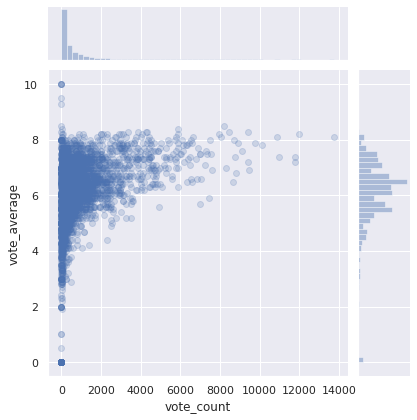

In [5]:
sns.set()
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.2)

- *sns.jointplot( ) は各変数のヒストグラムも表示してくれる*

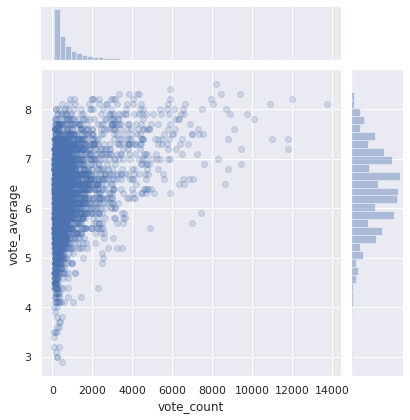

In [8]:
df = pd.read_csv('../pandas/dataset/tmdb_5000_movies.csv')
df = df[df['vote_count'] > 100]                                   # vote_count 100以下のものを除く
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.2)

- 外れ値を除外することができた。１人や２人の少ない人数のレビュー数が１０などの高得点でもあまり信用はない


- **こういう高い信頼度の物ができたら kind='reg' を指定すると関係性を線で引いて確認することができる**

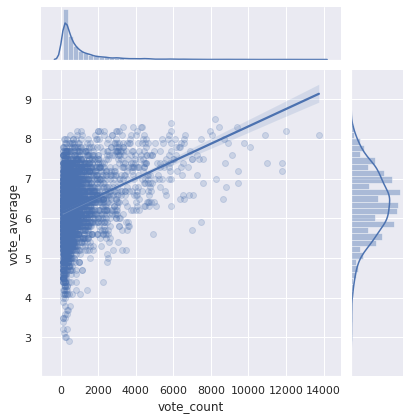

In [11]:
df = pd.read_csv('../pandas/dataset/tmdb_5000_movies.csv')
df = df[df['vote_count'] > 100]                                   # vote_count 100以下のものを除く
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='reg', joint_kws={'scatter_kws': {'alpha': 0.2}})

- vote count が多いとスコアの平均値も上がっていくということが言える
    - おそらく人気の映画というのは、評価も高く色々な人がレビューをつけるのでこのように高くなる
        - あながち間違っていないと言える


- ※ 厳密な解析にはもっとちゃんとした解析が必要


#### *kind='reg'* を指定した時は 
- **alpha=0.2 の指定を joint_kws={'scatter_kws': {'alpha': 0.2}}**
    - 上記のように指定する。出ないと error が出てしまう

In [18]:
# dict でも良い / 引数の場合はこちらの方が見やすいので良い
dict(alpha=0.2)

{'alpha': 0.2}

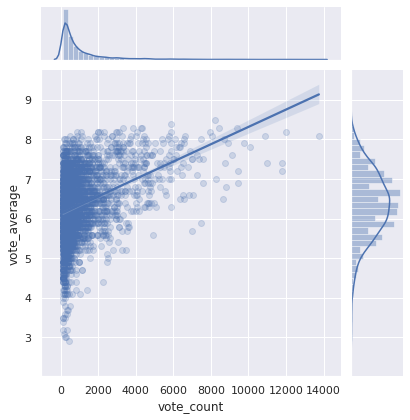

In [19]:
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='reg', joint_kws={'scatter_kws': dict(alpha=0.2)})

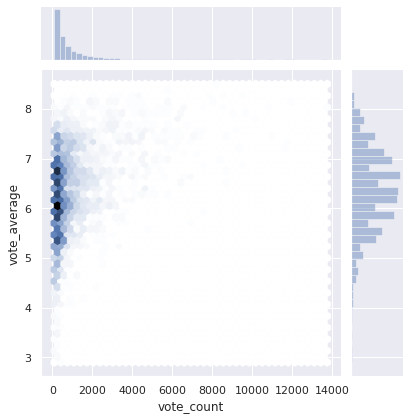

In [23]:
# hex (重なりが分かり易い/どこに集中しているか視認しやすい)
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='hex')

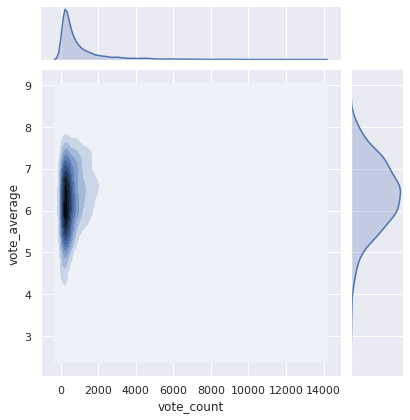

In [25]:
# kde : 確率密度関数　/　それぞれの確率密度関数を組み合わせて二次元で表現したようなグラフができる
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='kde')

- イメージは山の頂点と頂点を結んで鳥瞰的に見ているイメージ。頂上になるにつれて色が濃くなるイメージ
    - 展開図に近い。　横から見た感じ。正面から見た感じ。上から鳥瞰的に見た感じ。

# pairplot( ) : ペアプロット
- 本当に頻繁に使う関数なのでしっかり覚える

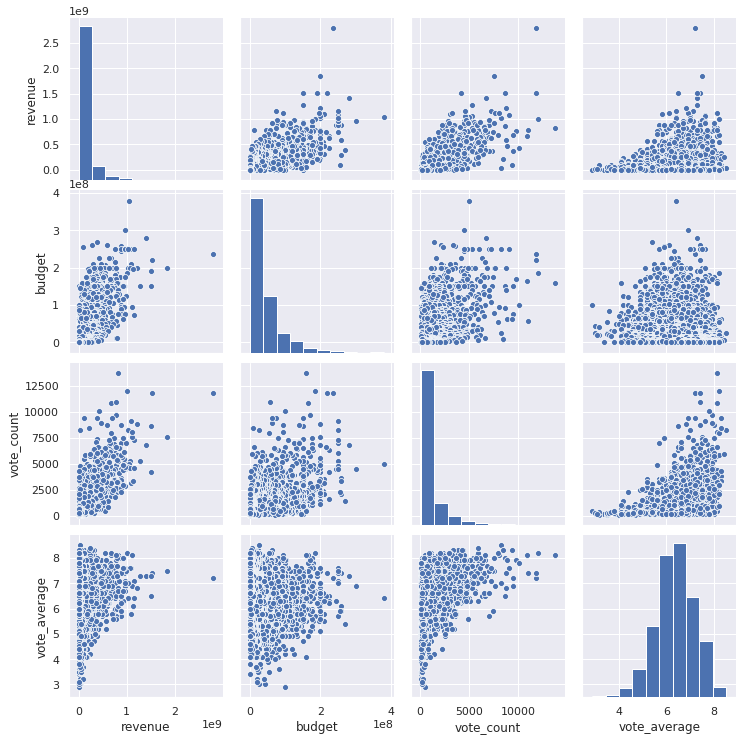

In [28]:
# 必要な columns だけ抽出して描画する
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average']])

## vote average が下位　50% だったら　low, 上位　50% だったら high

In [29]:
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > df['vote_average'].median() else 'low')

- *上記の　lambda の解説*
    - vote average を apply()関数を使用して if 文で条件抽出
    1. もし　vote average が中央値より大きければ(50%以上) high を返す
    2. それ以外は　low を返す


- <u>*median( )は処理が重いため下記のように別変数にして処理したほうが良い*</u>

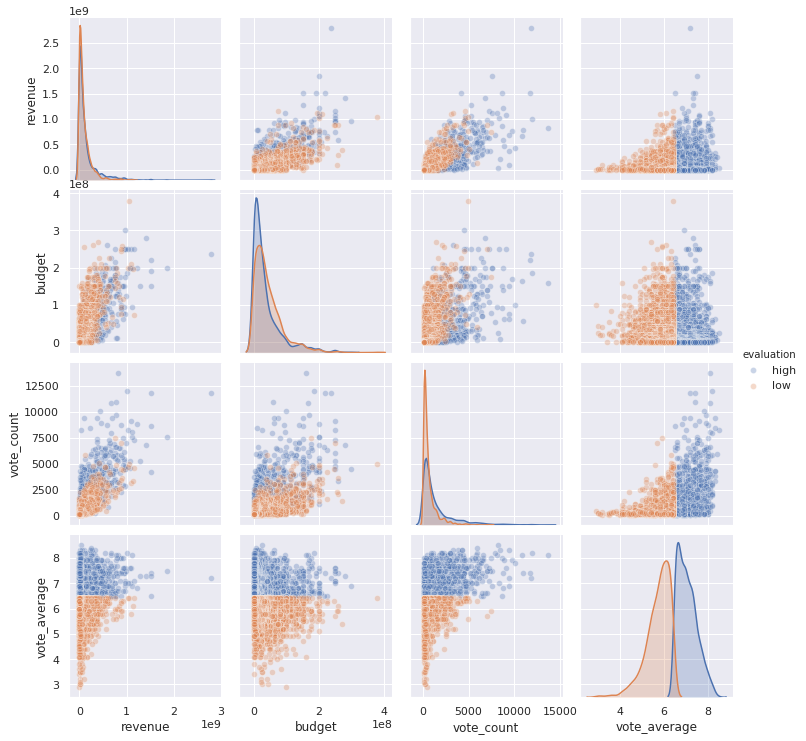

In [37]:
# median( )は処理が重いため別変数にしておく
vote_average_median = df['vote_average'].median()

# vote averageが下位50%だったらlow, 上位50%だったらhigh
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > vote_average_median else 'low')

# low　と　high の色分け
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'evaluation']],
             hue='evaluation',
            plot_kws={'alpha': 0.3})  # 透明度

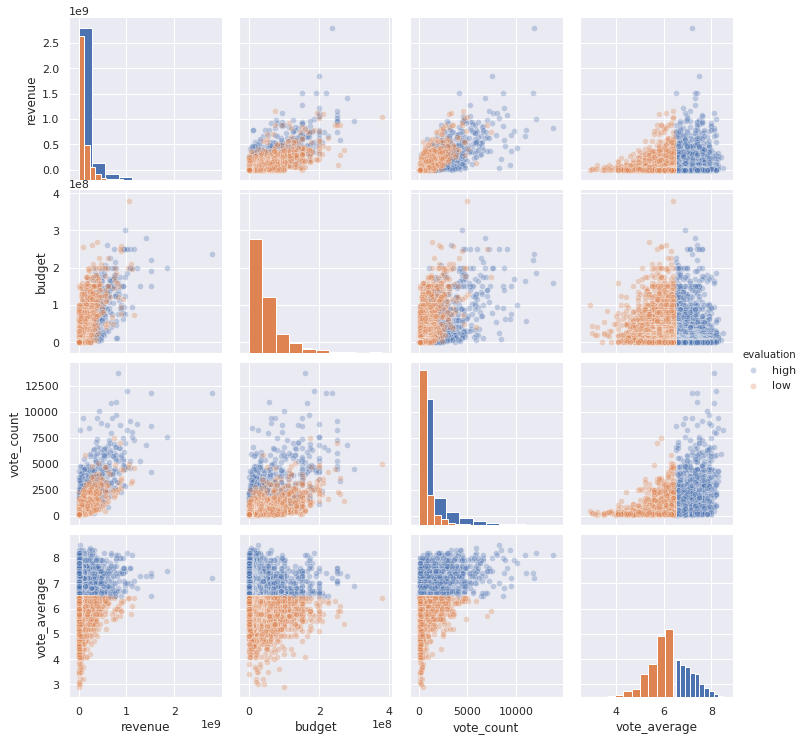

In [36]:
# median( )は処理が重いため別変数にしておく
vote_average_median = df['vote_average'].median()

# vote averageが下位50%だったらlow, 上位50%だったらhigh
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > vote_average_median else 'low')

# low　と　high の色分け
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'evaluation']],
             hue='evaluation',
            plot_kws={'alpha': 0.3}, # 透明度
            diag_kind='hist')        # 確立密度関数を　ヒストグラムに変える